In [2]:
import random
import pickle
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mask_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Landcover\Zoom 1\N-34-97-C-b-1-2.tif"



In [5]:
original_mask_cv = cv2.imread(mask_path)
original_mask = original_mask_cv[:,:,0]
print(original_mask.shape, np.unique(original_mask))

(4683, 4232) [0 1 2 3 4]


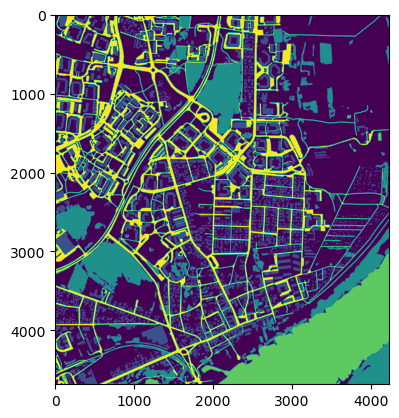

In [6]:
plt.imshow(original_mask)

In [7]:
Unlabelled = [155, 155, 155]  # seda
Building = [60, 16, 152]  # tmave modra
Land = [132, 41, 246]  # fialova
Road = [110, 193, 228]  # svetle modra
Vegetation = [254, 221, 58]  # svetle zluta
Water = [226, 169, 41]  # tmava zluta / oranzova

In [8]:
encoded_mask = np.zeros([original_mask.shape[0], original_mask.shape[1],3])

encoded_mask[(original_mask == 0),:] = Unlabelled
encoded_mask[(original_mask == 1),:] = Building
encoded_mask[(original_mask == 2),:] = Vegetation
encoded_mask[(original_mask == 3),:] = Water
encoded_mask[(original_mask == 4),:] = Road


encoded_mask = (encoded_mask).astype(np.uint8)
print(encoded_mask.shape, np.unique(encoded_mask))


(4683, 4232, 3) [ 16  41  58  60 110 152 155 169 193 221 226 228 254]


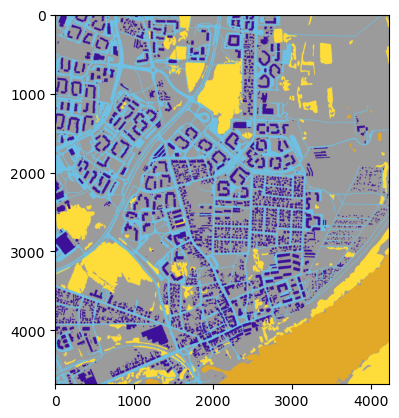

In [9]:
plt.imshow(encoded_mask)

In [10]:
save_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Landcover\Zoom 1\mask.png"

print(encoded_mask.shape, np.unique(encoded_mask))
encoded_bgr_mask = cv2.cvtColor(encoded_mask, cv2.COLOR_RGB2BGR)



cv2.imwrite(save_path, encoded_bgr_mask)


(4683, 4232, 3) [ 16  41  58  60 110 152 155 169 193 221 226 228 254]


True

In [23]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA
from predict_C_fun import predict_modelC
def jacard_coef(y_true, y_pred):
        return 0
def dice_loss_plus_1focal_loss(y_true, y_pred):
        return 0
model_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\MODELS\model_512_40_DSV30LITE_fd.h5"
model = tensorflow.keras.models.load_model(model_path, custom_objects={'jacard_coef':jacard_coef, 'dice_loss_plus_1focal_loss':dice_loss_plus_1focal_loss})
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________